In [1]:
import os
import pandas as pd

# 1. Get the Current Directory
current_directory = os.getcwd()
# 2. Construct the Full Path to the CSV File
csv_file_path = os.path.join(current_directory,  'hotel_multimodal.csv')
# Read the CSV file
df_hotels = pd.read_csv(csv_file_path)
geocoded_hotels_path = os.path.join(current_directory, 'geocoded_hotels.csv')
# Read the CSV file
geocoded_hotels = pd.read_csv(geocoded_hotels_path)

In [5]:
import requests

def get_current_location():
    try:
        response = requests.get('https://ipinfo.io/json')
        data = response.json()
        
        location = data.get('loc', '')
        if location:
            latitude, longitude = map(float, location.split(','))
            return latitude, longitude
        else:
            return None, None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

latitude, longitude = get_current_location()
if latitude and longitude:
    print(f"Current location: Latitude = {latitude}, Longitude = {longitude}")
else:
    print("Could not retrieve the current location.")


Current location: Latitude = 44.4048, Longitude = 8.9444


In [2]:
from geopy.geocoders import Nominatim

def get_coordinates(location_name):
    """Fetches latitude and longitude coordinates for a given location name.

    Args:
        location_name (str): The name of the location (e.g., "Rome, Italy").

    Returns:
        tuple: A tuple containing the latitude and longitude (float values),
               or None if the location is not found.
    """

    geolocator = Nominatim(user_agent="coordinate_finder")
    location = geolocator.geocode(location_name)

    if location:
        return location.latitude, location.longitude
    else:
        return None  # Location not found


In [3]:
import pandas as pd
import numpy as np
from haversine import haversine  # Install haversine library: pip install haversine
def find_nerby(place=None):
    if place!=None:
        coordinates = get_coordinates(place)
        if coordinates:
            latitude, longitude = coordinates
            print(f"The coordinates of {place} are: Latitude: {latitude}, Longitude: {longitude}")
        else:
            print(f"Location not found: {place}")
    else:
        latitude, longitude = get_current_location()
        if latitude and longitude:
            print(f"Current location: Latitude = {latitude}, Longitude = {longitude}")
    # Load the geocoded_hotels DataFrame 
    current_directory = os.getcwd()
    geocoded_hotels_path = os.path.join(current_directory, 'geocoded_hotels.csv')
    geocoded_hotels = pd.read_csv(geocoded_hotels_path)

    # Define input coordinates for the reference location
    reference_latitude = latitude
    reference_longitude = longitude

    # Haversine Distance Function
    def calculate_haversine_distance(lat1, lon1, lat2, lon2):
        """Calculates the Haversine distance between two points on the Earth's surface."""
        return haversine((lat1, lon1), (lat2, lon2))

    # Calculate distances to all other points in the DataFrame
    geocoded_hotels['distance_km'] = geocoded_hotels.apply(
        lambda row: calculate_haversine_distance(
            reference_latitude, reference_longitude, row['latitude'], row['longitude']
        ),
        axis=1
    )

    # Sort by distance and get the top 5 closest points
    closest_hotels = geocoded_hotels.sort_values(by='distance_km').head(5)

    # Display the results
    print("The 5 closest locations are:\n")
    print(closest_hotels)
    return closest_hotels

In [6]:
df_found=find_nerby()

Current location: Latitude = 44.4048, Longitude = 8.9444
The 5 closest locations are:

       hotel_id                       hotel_name  chain_id  latitude  \
13057     18021             Starhotels President        -1  44.40494   
11855     16397                     Melia Genova        -1  44.40212   
14386     19841             Bristol Palace Hotel        -1  44.40679   
12274     16954                  NH Genova Plaza        -1  44.41079   
17708     24307  BEST WESTERN Hotel Porto Antico         0  44.41181   

       longitude    city country    state  county         suburb postcode  \
13057    8.94800  Genova  Italia  Liguria  Genova  Medio Levante    16129   
11855    8.93809  Genova  Italia  Liguria  Genova      Carignano    16128   
14386    8.93620  Genova  Italia  Liguria  Genova       Portoria    16123   
12274    8.93791  Genova  Italia  Liguria  Genova       Portoria    16122   
17708    8.92858  Genova  Italia  Liguria  Genova     Centro Est    16100   

                 

In [7]:
# Converting df_found[["hotel_id"]].values to a list
hotel_ids = df_found["hotel_id"].values.tolist()

# Extracting rows from df_hotels where hotel_id is in the list hotel_ids
filtered_df = df_hotels[df_hotels['hotel_id'].isin(hotel_ids)]


# Ordering filtered_df by the order of hotel_ids
filtered_df['hotel_id'] = pd.Categorical(filtered_df['hotel_id'], categories=hotel_ids, ordered=True)
filtered_df = filtered_df.sort_values('hotel_id').reset_index(drop=True)

C:\Users\rusla\AppData\Local\Temp\ipykernel_23808\341620097.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hotel_id'] = pd.Categorical(filtered_df['hotel_id'], categories=hotel_ids, ordered=True)


C:\Users\rusla\AppData\Local\Temp\ipykernel_23808\2670846581.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.groupby('hotel_id').head(2)
C:\Users\rusla\AppData\Local\Temp\ipykernel_23808\2670846581.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hotel_images = grouped_df[filtered_df['hotel_id'] == hotel_id]
C:\Users\rusla\AppData\Local\Temp\ipykernel_23808\2670846581.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hotel_images = grouped_df[filtered_df['hotel_id'] == hotel_id]
C:\Users\rusla\AppData\Local\Temp\ipykernel_23808\2670846581.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hotel_images = grouped_df[filtered_df['hotel_id'] == hotel_id]
C:\Users\rusla\

Skipping image at URL: https://i.travelapi.com/hotels/1000000/30000/22700/22623/bb6f4758_b.jpg


C:\Users\rusla\AppData\Local\Temp\ipykernel_23808\2670846581.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hotel_images = grouped_df[filtered_df['hotel_id'] == hotel_id]


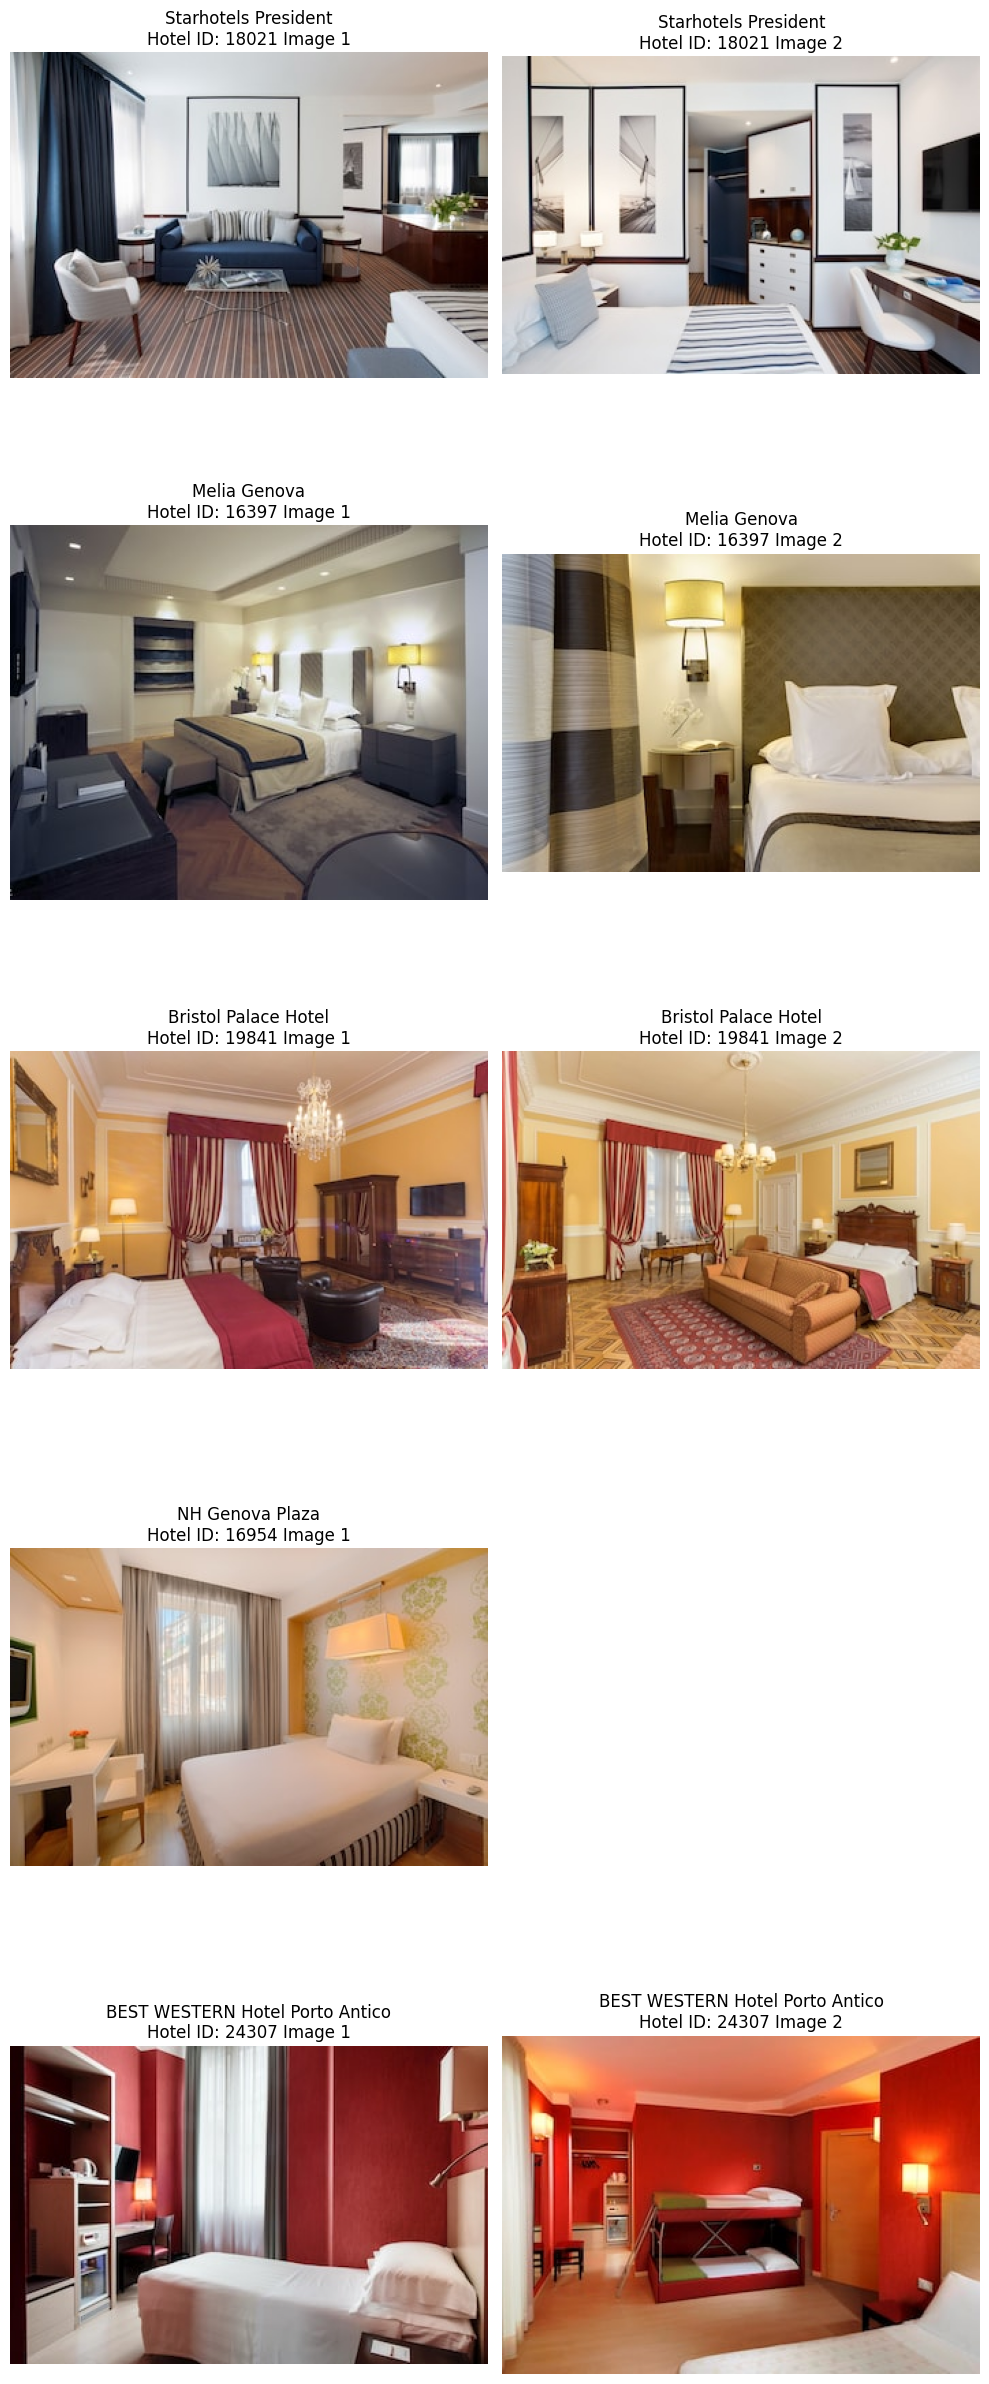

In [8]:
import pandas as pd
import requests
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import matplotlib.pyplot as plt

# Group by hotel_id and take the first 2 image URLs for each hotel
grouped_df = filtered_df.groupby('hotel_id').head(2)

# Download and display the images
unique_hotel_ids = grouped_df['hotel_id'].unique()

fig, axs = plt.subplots(len(unique_hotel_ids), 2, figsize=(10, 5 * len(unique_hotel_ids)))

for i, hotel_id in enumerate(unique_hotel_ids):
    hotel_images = grouped_df[filtered_df['hotel_id'] == hotel_id]
    hotel_name = hotel_images.iloc[0]['hotel_name']
    
    for j, image_url in enumerate(hotel_images['image_url']):
        try:
            response = requests.get(image_url)
            response.raise_for_status()  # Check for request errors
            img = Image.open(BytesIO(response.content))
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            axs[i, j].set_title(f"{hotel_name}\nHotel ID: {hotel_id} Image {j+1}")
        except (requests.RequestException, UnidentifiedImageError):
            print(f"Skipping image at URL: {image_url}")
            axs[i, j].axis('off')  # Keep the axis off for empty slots

plt.tight_layout()
plt.show()


In [2]:
from transformers import AutoProcessor, LlavaForConditionalGeneration
from transformers import BitsAndBytesConfig
import torch

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

model_id = "llava-hf/llava-1.5-7b-hf"

processor = AutoProcessor.from_pretrained(model_id)
model = LlavaForConditionalGeneration.from_pretrained(model_id, quantization_config=quantization_config, device_map="auto")

c:\Dropbox\23-GITHUB\Projects\watsonx-with-multimodal-llava\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Loading checkpoint shards: 100%|██████████| 3/3 [00:10<00:00,  3.66s/it]
